<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    
</div>


# Machine Learning: Laboratorio 01

## Red Neuronal Feedforward
 
<br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Profesor: Tomás Fontecilla </em><br>
    
**Nombre Estudiante(s)**:  
- César Godoy Delaigue
- Cristhian Solís
- Pablo Madariaga



## Introducción

En la industria alimentaria, la clasificación de la calidad de los productos es un proceso crucial para asegurar que los consumidores reciban productos frescos y de alta calidad. Uno de los desafíos es identificar, de manera eficiente y precisa, las características de calidad en frutas como las manzanas, las cuales son evaluadas en términos de atributos físicos y químicos.

En este informe, se implementará un modelo de **Red Neuronal Feedforward** para clasificar la calidad de las manzanas basado en un conjunto de datos llamado **Apple Quality** obtenido de **Kaggle**. Este dataset contiene información detallada de diversas características, tales como el tamaño, peso, dulzura, crujiente, jugosidad, y acidez de las manzanas, las cuales influyen en la percepción de calidad del producto.

A través del uso de redes neuronales, se busca construir un modelo capaz de predecir si una manzana cumple con los estándares de calidad definidos, permitiendo una clasificación automática y eficiente. Este enfoque no solo mejorará la precisión en la clasificación, sino que también contribuirá a la optimización de los procesos de selección en la industria frutícola.


### Metodología

El análisis que se llevará a cabo para la clasificación de la calidad de las manzanas mediante redes neuronales incluye las siguientes etapas:

1. **Preparación y Preprocesamiento de los Datos**:
   - **Estandarización**: Dado que las redes neuronales son sensibles a la escala de los datos, es fundamental estandarizar las características numéricas para que todas tengan una media de 0 y una desviación estándar de 1. Esto ayudará a que el modelo converja más rápido y a reducir problemas de disparidad entre las variables.
   - **División del Conjunto de Datos**: El dataset se dividirá en conjuntos de entrenamiento y prueba para evaluar la capacidad de generalización del modelo. Usualmente, se utilizará un 80% para entrenamiento y un 20% para prueba.

2. **Construcción e Implementación del Modelo de Red Neuronal**:
   - **Arquitectura de la Red**: Se seleccionará una arquitectura de red neuronal feedforward, con una capa de entrada que recibe las características del dataset, varias capas ocultas para la extracción de patrones complejos, y una capa de salida que determine la clasificación de la calidad de la manzana.
   - **Función de Activación**: Se aplicará una función de activación no lineal (como ReLU en las capas ocultas) para permitir que la red aprenda relaciones no lineales. En la capa de salida, se usará una función de activación adecuada para tareas de clasificación, como softmax o sigmoide.
   - **Función de Pérdida**: Se empleará una función de pérdida de entropía cruzada, ya que es adecuada para problemas de clasificación.

3. **Optimización y Ajuste de Hiperparámetros**:
   - **Entrenamiento del Modelo**: Se utilizará un algoritmo de optimización, como Adam, para minimizar la función de pérdida y ajustar los pesos de la red.
   - **Tuning de Hiperparámetros**: Para mejorar el rendimiento, se llevará a cabo una búsqueda de hiperparámetros clave, como el número de capas ocultas, el número de neuronas por capa, la tasa de aprendizaje, y el número de épocas. La técnica de búsqueda (grid search o random search) se elegirá en función de la complejidad y el tiempo disponible.

4. **Evaluación y Validación del Modelo**:
   - **Detección de Sobreajuste**: Para verificar si existe sobreajuste, se evaluará el rendimiento del modelo tanto en el conjunto de entrenamiento como en el de prueba. Si se observa un rendimiento significativamente mejor en el conjunto de entrenamiento, se explorarán técnicas de regularización como dropout o early stopping para mitigar el sobreajuste.
   - **Métricas de Evaluación**: Se analizarán métricas como la precisión, la sensibilidad, la especificidad y la matriz de confusión para evaluar el desempeño del modelo.

5. **Análisis de Resultados y Conclusiones**:
   - **Interpretación de Resultados**: Se presentarán y analizarán los resultados obtenidos en términos de las métricas de evaluación y se compararán con los objetivos iniciales.
   - **Conclusiones**: Se ofrecerán conclusiones sobre la eficacia del modelo para la clasificación de la calidad de las manzanas, y se sugerirán posibles mejoras para trabajos futuros.


### El Dataset


Este conjunto de datos contiene información sobre varios atributos de un conjunto de frutas, proporcionando información sobre sus características. El conjunto de datos incluye detalles como el ID de la fruta, el tamaño, el peso, la dulzura, la crujiente, la jugosidad, la madurez, la acidez y la calidad.

#### Atributos del Dataset

* A_id: Identificador único para cada fruta
* Size: Tamaño de la fruta
* Weight: Peso del fruto
* Sweetness: Grado de dulzor del fruto.
* Crunchiness: Textura que indica el carácter crujiente de la fruta.
* Juiciness: Nivel de jugosidad del fruto.
* Ripeness: Etapa de madurez del fruto.
* Acidity: Nivel de acidez de la fruta.
* Quality: Calidad general de la fruta.

### ***Librerias***

In [35]:
# Importar librerías necesarias
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns

In [36]:
# --- Importar dataset ---
data_path = r'../data/apple_quality.csv'  # ruta dataset

# Leer el dataset
dataset_import = pd.read_csv(data_path)

# Ver las primeras filas del dataset
print("Dataset cargado:")
print(dataset_import.head())

Dataset cargado:
   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0     0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1     1 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2     2 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3     3 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4     4  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

    Acidity Quality  
0 -0.491590    good  
1 -0.722809    good  
2  2.621636     bad  
3  0.790723    good  
4  0.501984    good  


In [37]:
dataset_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


In [38]:
dataset_import.describe()   

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


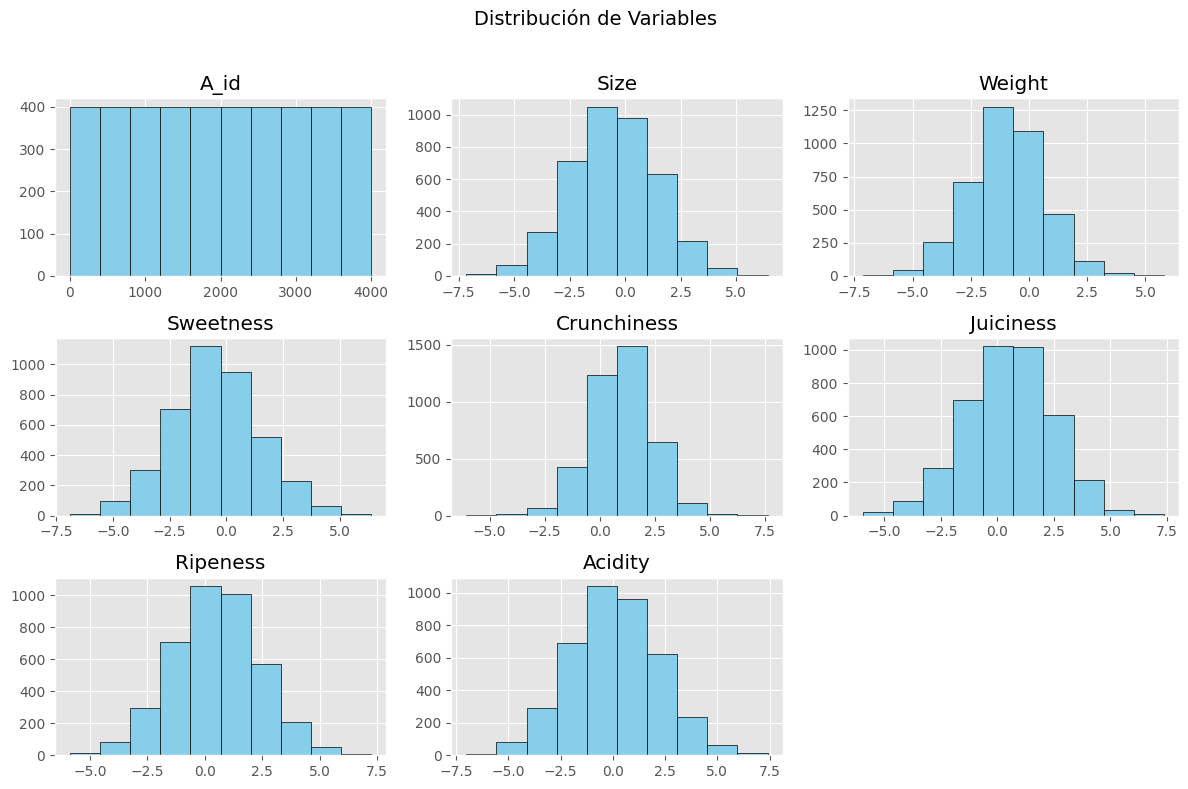

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('ggplot')

# Seleccionar solo columnas numéricas
numeric_df = dataset_import.select_dtypes(include=['float64', 'int'])

# Crear un histograma para cada columna numérica
fig, axes = plt.subplots(len(numeric_df.columns) // 3 + 1, 3, figsize=(12, 8), tight_layout=True)
fig.suptitle("Distribución de Variables", fontsize=14)
axes = axes.flatten()

for i, column in enumerate(numeric_df.columns):
    axes[i].hist(numeric_df[column], bins=10, edgecolor='black', color='skyblue')
    axes[i].set_title(column)

# Eliminar cualquier subplot sobrante
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# 1. **Preparación y Preprocesamiento de los Datos**:

###  Codificación de variable objetivo

In [40]:
le = LabelEncoder()
dataset_import['Quality'] = le.fit_transform(dataset_import['Quality'])  # 0 = 'bad', 1 = 'good'

In [42]:
# Separar características y etiquetas

X = dataset_import[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']]
y = dataset_import['Quality']

# 2. **Construcción e Implementación del Modelo de Red Neuronal**:

In [43]:
# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Definir y compilar el modelo
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

Epoch 1/10


c:\Entorno_Desarrollo_UDD\Machine_Learning_Avanzado\entorno_machine\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6306 - loss: 0.6331 - val_accuracy: 0.8225 - val_loss: 0.4395
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8017 - loss: 0.4286 - val_accuracy: 0.8537 - val_loss: 0.3539
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8452 - loss: 0.3435 - val_accuracy: 0.8850 - val_loss: 0.3064
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8677 - loss: 0.2968 - val_accuracy: 0.8900 - val_loss: 0.2837
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8803 - loss: 0.2708 - val_accuracy: 0.8938 - val_loss: 0.2777
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8733 - loss: 0.2797 - val_accuracy: 0.8988 - val_loss: 0.2681
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8836 - loss: 0.2666 - val_accuracy: 0.9075 - val_loss: 0.2643
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - accuracy: 0.8861 - loss: 0.2539 - val_accuracy: 0.8900 - va

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step


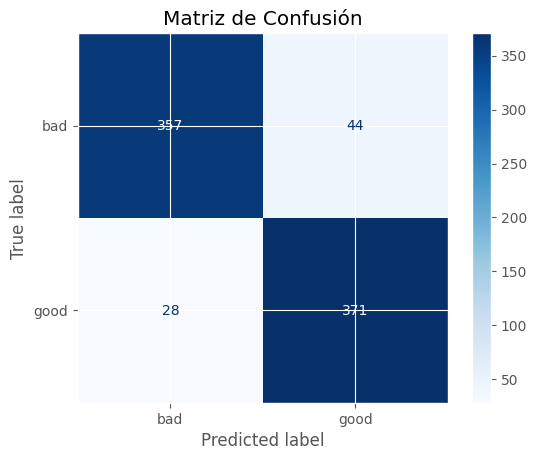

              precision    recall  f1-score   support

         bad       0.93      0.89      0.91       401
        good       0.89      0.93      0.91       399

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.91       800
weighted avg       0.91      0.91      0.91       800



In [44]:
# Generar predicciones y matriz de confusión
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Mostrar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['bad', 'good'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred, target_names=['bad', 'good']))

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step
AUC en el conjunto de entrenamiento: 0.97
AUC en el conjunto de prueba: 0.96


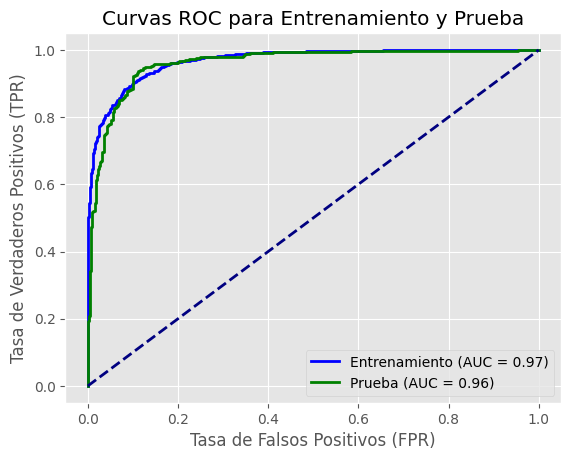

In [45]:

# AUC en el conjunto de entrenamiento
y_train_pred_prob = model.predict(X_train)
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_prob)
auc_train = auc(fpr_train, tpr_train)

# AUC en el conjunto de prueba
y_test_pred_prob = model.predict(X_test)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)
auc_test = auc(fpr_test, tpr_test)

# Mostrar los valores de AUC
print(f"AUC en el conjunto de entrenamiento: {auc_train:.2f}")
print(f"AUC en el conjunto de prueba: {auc_test:.2f}")

# Graficar las curvas ROC para ambos conjuntos
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Entrenamiento (AUC = {auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Prueba (AUC = {auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea de referencia para clasificador aleatorio
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC para Entrenamiento y Prueba')
plt.legend(loc="lower right")
plt.show()


# 3. **Optimización y Ajuste de Hiperparámetros**:

### Hiperparámetros

Se agregan capas ocultas y número de neuronas, además se cambia la función activación.

In [13]:
# Definir y compilar el modelo
model = Sequential([
    Dense(128, activation='tanh', input_dim=X_train.shape[1]),
    Dense(64, activation='tanh'),
    Dense(32, activation='tanh'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

Epoch 1/20


c:\Entorno_Desarrollo_UDD\Machine_Learning_Avanzado\entorno_machine\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7025 - loss: 0.5596 - val_accuracy: 0.7750 - val_loss: 0.4928
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7490 - loss: 0.4951 - val_accuracy: 0.8087 - val_loss: 0.4387
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8138 - loss: 0.4045 - val_accuracy: 0.8475 - val_loss: 0.3696
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8501 - loss: 0.3456 - val_accuracy: 0.8700 - val_loss: 0.3412
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8698 - loss: 0.3043 - val_accuracy: 0.8838 - val_loss: 0.3083
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8763 - loss: 0.2910 - val_accuracy: 0.8938 - val_loss: 0.2858
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8936 - loss: 0.2521 - val_accuracy: 0.9013 - val_loss: 0.2698
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8941 - loss: 0.2437 - val_accuracy: 0.9137 - val_

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step


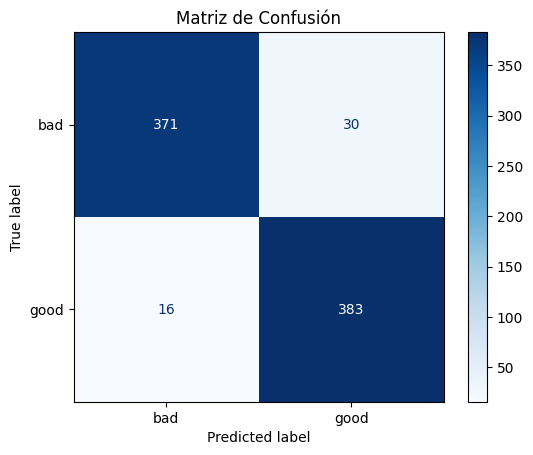

              precision    recall  f1-score   support

         bad       0.96      0.93      0.94       401
        good       0.93      0.96      0.94       399

    accuracy                           0.94       800
   macro avg       0.94      0.94      0.94       800
weighted avg       0.94      0.94      0.94       800



In [14]:
# Generar predicciones y matriz de confusión
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Mostrar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['bad', 'good'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred, target_names=['bad', 'good']))

# 4. **Evaluación y Validación del Modelo**:

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step
AUC en el conjunto de entrenamiento: 0.99
AUC en el conjunto de prueba: 0.98


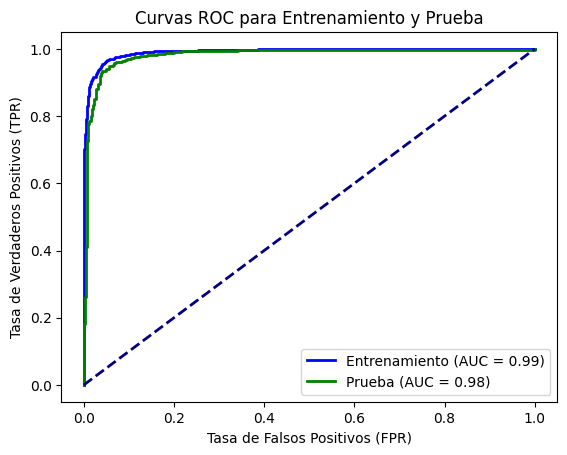

In [15]:

# AUC en el conjunto de entrenamiento
y_train_pred_prob = model.predict(X_train)
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_prob)
auc_train = auc(fpr_train, tpr_train)

# AUC en el conjunto de prueba
y_test_pred_prob = model.predict(X_test)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)
auc_test = auc(fpr_test, tpr_test)

# Mostrar los valores de AUC
print(f"AUC en el conjunto de entrenamiento: {auc_train:.2f}")
print(f"AUC en el conjunto de prueba: {auc_test:.2f}")

# Graficar las curvas ROC para ambos conjuntos
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Entrenamiento (AUC = {auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Prueba (AUC = {auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea de referencia para clasificador aleatorio
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC para Entrenamiento y Prueba')
plt.legend(loc="lower right")
plt.show()


Interpretación
AUC alto y similar en ambos conjuntos: Un AUC cercano a 1 en el conjunto de entrenamiento (0.99) y un AUC similar en el conjunto de prueba (0.98) sugieren que el modelo está aprendiendo bien los patrones en los datos de entrenamiento y generaliza bien en datos no vistos (conjunto de prueba).

No hay señales claras de sobreajuste:

Cuando hay sobreajuste, el AUC en entrenamiento suele ser mucho más alto que el AUC en prueba, indicando que el modelo ha memorizado los datos de entrenamiento pero no puede generalizar.
Aquí, como la diferencia es mínima (0.01), es poco probable que haya sobreajuste.

# 5. **Análisis de Resultados y Conclusiones**



